In [133]:
#Importando pacotes
import matplotlib.pyplot as plt
import pandas as pd
import requests as req
from statsmodels.graphics.tsaplots import quarter_plot
import numpy as np
from matplotlib.backends.backend_pdf import PdfPages
import seaborn as sns
import warnings

warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)



In [111]:
url = 'https://apisidra.ibge.gov.br/values/t/5932/n1/all/v/6561,6562,6563,6564/p/all/c11255/90687,90691,90696,90707,93404,93405,93406,93407,93408/d/v6561%201'
r = req.get(url)
raw = r.json()

In [141]:
# CRIANDO AS FUNÇÕES NECESSÁRIAS



def create_df(var, begin=1996):
    '''
    Essa função separa os dataframe bruto entre as variáveis 6561,6562,6563,6564
    Ela trata os dados e inclui no dicionário var_dict onde a key é a variável e o value é o dataframe
    var é a variável
    begin determina quando inicia os dados, para filtrar bast alterar o ano
    '''
    df_var = df.loc[df['Variável (Código)']==var].copy()
    df_var['Trimestre (Código)'] = df_var['Trimestre (Código)'].map(str).str[:4] + 'Q' + df_var['Trimestre (Código)'].map(str).str[-1]
    df_var['ano'] = df_var['Trimestre (Código)'].map(str).str[:4]
    df_var = df_var.apply(pd.to_numeric, errors='ignore')
    df_var['Trimestre'] = pd.to_datetime(df_var['Trimestre (Código)']).dt.to_period('Q')
    df_var['Trimestre (string)'] = df_var['Trimestre'].astype('str')
    df_var = df_var.loc[df_var['Trimestre'].dt.year >=2003]
    var_dict[var] = df_var


def plot_sector(var, sector):
    '''
    Está função gera um gráfico para uma determinada variável e setor do PIB, os valores dizem respeito
    a variação de volume
    var é a variável que pode ser 6561,6562,6563,6564 para a descrição visite https://apisidra.ibge.gov.br
    sector é setor do PIB
    '''
    dict_convert = {'Agropecuária - total': 'Agropecuária', 
                    'Indústria - total':'Indústria',
                    'Serviços - total':'Serviços',
                    'PIB a preços de mercado':'PIB',
                    'Despesa de consumo das famílias':'Consumo das Famílias',
                    'Despesa de consumo da administração pública':'Consumo do Governo',
                    'Formação bruta de capital fixo':'FBKF',
                    'Exportação de bens e serviços':'Exportação',
                    'Importação de bens e serviços':'Importação'}
    
    title = dict_convert[sector]
    var = str(var)
    data = var_dict[var]
    data[['Valor', 'Setores e subsetores', 'Trimestre', 'Trimestre (string)', 'ano']] #colunas de interesse
    line = data[data['Setores e subsetores']==sector] #filtra o setor
    line.reset_index(inplace=True, drop=True)
    last_year = line['ano'].values[-1]
    last_year = (line['ano'] == last_year).idxmax()

    #Início do Plot
    plt.figure(figsize=(8, 4))
    palette = np.where(line['Valor'] >= 0, 'blue', 'red')
    #sns.lineplot(x='Trimestre (string)', y='Valor', data=line, marker='', linestyle='-')
    sns.barplot(x='Trimestre (string)', y='Valor', data=line, palette=palette)

    plt.xlabel('Data')
    plt.ylabel('%', rotation=0)

    # configurando os xticks
    locs, _ = plt.xticks()
    ticks_positions = list(np.arange(locs[0], locs[-1], 20)) + [last_year]
    plt.xticks(ticks_positions, line['ano'][ticks_positions])


    # cria anotação no gráfico
    plt.annotate('fonte: IBGE, elaboração própria', (0, 0), (0, -30),
                fontsize=10, xycoords='axes fraction', textcoords='offset points', va='top')

    # cria o título

    plt.title(f'{title} (Variação QoQ interanual)', fontsize=14)


    

In [129]:
df = pd.DataFrame(raw)
df.columns = df.iloc[0]
df.drop(0, inplace=True)
df.drop(df.columns[[0,1,2,3,5,6,8,10,11]], axis=1, inplace=True)


var_dict = {}



#ANÁLISE PIB Trimestral Volume TABELA 5932
for var in list(df['Variável (Código)'].unique()):
    create_df(var,2004)


#A lista de setores está na set_list
set_list = list(df['Setores e subsetores'].unique())

C:\Users\mkenj\AppData\Local\Temp\ipykernel_22428\316571898.py:16: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_var['Trimestre'] = pd.to_datetime(df_var['Trimestre (Código)']).dt.to_period('Q')
C:\Users\mkenj\AppData\Local\Temp\ipykernel_22428\316571898.py:16: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_var['Trimestre'] = pd.to_datetime(df_var['Trimestre (Código)']).dt.to_period('Q')
C:\Users\mkenj\AppData\Local\Temp\ipykernel_22428\316571898.py:16: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_var['Trimestre'] = pd.to_datetime(df_var['Trimestre (Código)']).dt.t

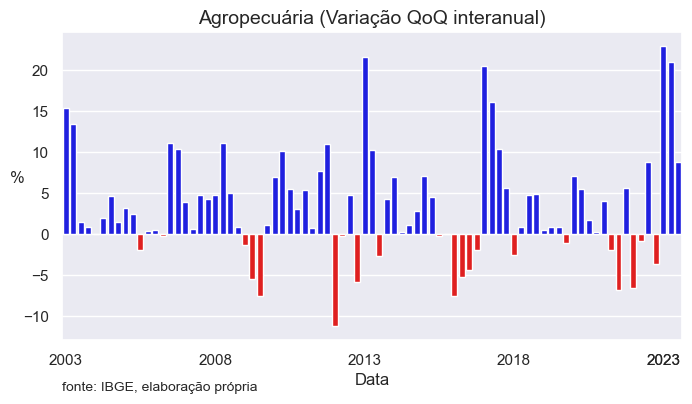

In [142]:
plot_sector(6561, set_list[0])

In [ ]:
data = var_dict['6561']
setor = set_list[0]
data = data[['Valor', 'Setores e subsetores', 'Trimestre', 'Trimestre (string)', 'ano']]
line = data[data['Setores e subsetores']==setor]
line.reset_index(inplace=True, drop=True)
last_year = line['ano'].values[-1]
last_year = (line['ano'] == last_year).idxmax()
plt.plot(line['Trimestre (string)'], line['Valor'])
locs, labels = plt.xticks()
ticks_positions = list(np.arange(locs[0], locs[-1], 20)) +  [last_year]
plt.xticks(ticks_positions, line['ano'][ticks_positions])
plt.annotate('fonte: IBGE, elaboração própria', (0, 0), (0, -30),
fontsize=10, xycoords='axes fraction', textcoords='offset points', va='top')
plt.title(f'{setor} (Variação QoQ interanual) ', fontsize=14)

In [100]:
set_list

['Agropecuária - total',
 'Indústria - total',
 'Serviços - total',
 'PIB a preços de mercado',
 'Despesa de consumo das famílias',
 'Despesa de consumo da administração pública',
 'Formação bruta de capital fixo',
 'Exportação de bens e serviços',
 'Importação de bens e serviços (-)']

c:\Users\mkenj\anaconda3\envs\research\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\mkenj\anaconda3\envs\research\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\mkenj\anaconda3\envs\research\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\mkenj\anaconda3\envs\research\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf valu

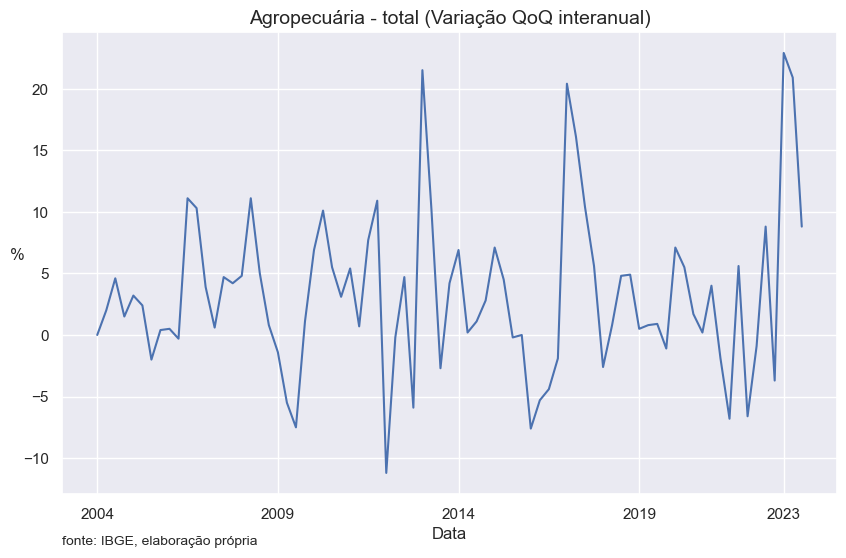

In [99]:


sns.set_theme()
line = data[data['Setores e subsetores'] == setor]
line.reset_index(inplace=True, drop=True)
last_year = line['ano'].values[-1]
last_year = (line['ano'] == last_year).idxmax()

# Plotting with Seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(x='Trimestre (string)', y='Valor', data=line, marker='', linestyle='-')

plt.xlabel('Data')
plt.ylabel('%', rotation=0)

# Set x-axis tick positions
locs, _ = plt.xticks()
ticks_positions = list(np.arange(locs[0], locs[-1], 20)) + [last_year]
plt.xticks(ticks_positions, line['ano'][ticks_positions])


# Add annotation
plt.annotate('fonte: IBGE, elaboração própria', (0, 0), (0, -30),
             fontsize=10, xycoords='axes fraction', textcoords='offset points', va='top')

# Set title
plt.title(f'{setor} (Variação QoQ interanual)', fontsize=14)

plt.show()

In [ ]:
pp = PdfPages(r"C:\Users\mkenj\Desktop\Github repositories\IPCA\images\teste_pib_var_QoQ.pdf")

for setor in set_list:
    plt.figure(figsize=(11.69,8.27))
    data = df[['Valor', 'Setores e subsetores', 'Trimestre', 'Trimestre (string)']]
    line = data[data['Setores e subsetores']==setor]
    line.reset_index(inplace=True, drop=True)
    plt.plot(line['Trimestre (string)'], line['Valor'])
    locs, labels = plt.xticks()
    ticks_positions = list(np.arange(locs[0], locs[-1],20))
    plt.xticks(ticks_positions, line['Trimestre (string)'][ticks_positions])
    plt.grid(axis='y')
    plt.annotate('fonte: IBGE, elaboração: Safra Asset', (0, 0), (0, -30),
    fontsize=10, xycoords='axes fraction', textcoords='offset points', va='top')
    plt.title(setor, fontsize=14)
    pp.savefig(orientation = 'landscape')
    plt.close()
    quarter_line = line.set_index('Trimestre')
    quarter_plot(quarter_line.Valor)
    plt.gcf().set_size_inches(11.69,8.27)
    trimestres = ['1ºTri', '2ºTri', '3ºTri', '4ºTri']
    plt.xticks(plt.xticks()[0], trimestres)
    plt.xlim((-5, len(line) + 5))
    bottom, top = plt.ylim()
    titulo = setor + ' (Gráfico de sazonalidade)'
    plt.title(titulo, fontsize=14)
    plt.grid(axis='y')
    plt.annotate('fonte: IBGE, elaboração: Safra Asset', (0,0), (0,-30),
    fontsize = 10, xycoords = 'axes fraction', textcoords = 'offset points', va = 'top')
    pp.savefig(orientation = 'landscape')
    plt.close()
    pp.close()
    